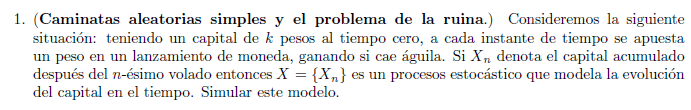

1. **Definición de la función y parámetros**: La función `AyS` simula la evolución del capital con tres parámetros:
   - `c`: capital inicial del jugador.
   - `l`: número de lanzamientos a realizar.
   - `pa`: probabilidad de ganar en cada lanzamiento.

2. **Inicialización del capital**: Se crea un array `capital` de tamaño `l + 1`, donde cada posición representa el capital en cada lanzamiento. El valor inicial es `c`.

3. **Simulación de lanzamientos**:
   - Se definen dos posibles estados: `1` (ganar) y `-1` (perder).
   - En cada lanzamiento, se elige uno de estos estados con probabilidad `pa` para ganar y `1 - pa` para perder.
   - Si el lanzamiento es favorable, se suma `1` al capital, y si no, se resta `1`. Este valor se guarda en `capital`.

4. **Retorno y visualización**:
   - La función devuelve el array `capital`, que contiene el capital en cada paso.
   - Luego, se grafica la evolución del capital a lo largo de los lanzamientos, mostrando cómo cambia el capital en el tiempo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def AyS(c, l, pa):
    """
    Simula una serie de lanzamientos que afectan el capital basado en una probabilidad dada.

    Parameters:
    c (float): Capital inicial.
    l (int): Número de lanzamientos a simular.
    pa (float): Probabilidad de ganar en cada lanzamiento.

    Returns:
    numpy.ndarray: Vector que contiene el capital en cada paso de los lanzamientos.
    """
    
    # Inicializa el vector de capital, con tamaño de l + 1 para incluir el capital inicial.
    capital = np.zeros(l + 1)
    capital[0] = c  # Establece el capital inicial.
    
    # Define las probabilidades de ganar o perder.
    p = [pa, 1 - pa]  # Probabilidad de ganar (pa) y perder (1 - pa).
    
    # Define los estados posibles, donde 1 representa ganar y -1 representa perder.
    states = [1, -1]

    # Realiza la simulación de lanzamientos.
    for i in range(1, l + 1):
        # Selecciona aleatoriamente entre ganar o perder usando las probabilidades definidas.
        lanzamiento = np.random.choice(states, p=p)
        
        # Actualiza el capital acumulado sumando el resultado del lanzamiento actual.
        capital[i] = capital[i - 1] + lanzamiento
    
    return capital



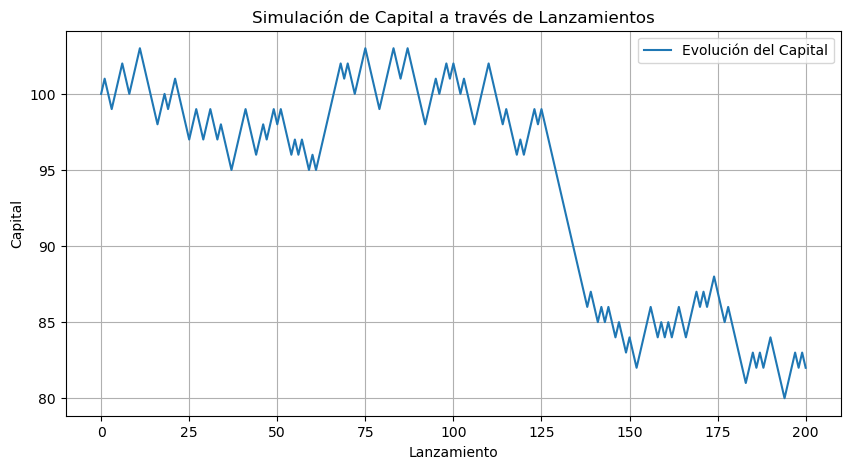

In [5]:
# Define los parámetros para la simulación
resultado = AyS(100, 200, 0.5)
# AyS = (mi capital inicial, el número de lanzamientos, probabilidad de que sea águila)

# Configura el tamaño de la figura para una visualización clara
plt.figure(figsize=(10, 5))

# Grafica el resultado de la simulación, mostrando la evolución del capital en el tiempo
plt.plot(resultado, label="Evolución del Capital")
plt.xlabel("Lanzamiento")    # Etiqueta del eje x
plt.ylabel("Capital")        # Etiqueta del eje y
plt.title("Simulación de Capital a través de Lanzamientos")  # Título del gráfico
plt.legend()  # Muestra la leyenda
plt.grid(True)  # Añade una cuadrícula para facilitar la lectura
plt.show()  # Muestra el gráfico


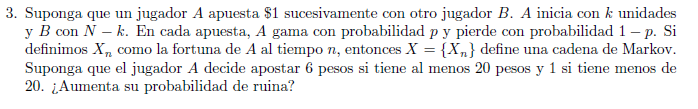

1. El código estima la probabilidad de ruina de un jugador que realiza una serie de apuestas con una probabilidad de ganar definida. Se consideran dos estrategias de apuesta:
   - Apuesta **variable**: el jugador apuesta una cantidad mayor cuando su capital supera un cierto umbral.
   - Apuesta **fija**: el jugador siempre apuesta la misma cantidad.

2. **Función `simulruina_variable`**:
   - **Parámetros**:
     - `M`: capital inicial.
     - `N`: objetivo de capital.
     - `pa`: probabilidad de ganar en cada jugada.
     - `size`: número de simulaciones.
   - **Estrategia de apuesta variable**:
     - Si el capital del jugador es al menos 20, apuesta 6. De lo contrario, apuesta 1.
   - **Simulación**:
     - En cada jugada, se calcula si el jugador gana o pierde según `pa`.
     - Si el capital alcanza 0, se considera que el jugador ha llegado a la ruina.
   - **Salida**:
     - Calcula y devuelve la probabilidad de ruina como la proporción de veces que el jugador ha perdido todo el capital.
   - **Visualización**:
     - Muestra un gráfico de la evolución del capital en una de las simulaciones.

3. **Función `simulruina_fija`**:
   - **Parámetros**: Igual que `simulruina_variable`.
   - **Estrategia de apuesta fija**:
     - Apuesta siempre 1 sin importar el capital actual.
   - **Simulación** y **Salida**:
     - Igual que en `simulruina_variable`.
   - **Visualización**:
     - Muestra un gráfico de la evolución del capital en una de las simulaciones con apuesta fija.


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def simulruina_variable(M, N, pa, size):
    """
    Simula el proceso de ruina con una apuesta variable en función del capital actual.

    Parameters:
    M (int): Capital inicial del jugador.
    N (int): Objetivo de capital para el jugador.
    pa (float): Probabilidad de ganar en cada jugada.
    size (int): Número de simulaciones a realizar.

    Returns:
    float: Probabilidad estimada de que el jugador llegue a la ruina.
    """
    contador_ruina = 0  # Contador para el número de veces que el jugador llega a la ruina
    states = [1, -1]    # Estados posibles: ganar (1) o perder (-1)
    p = [pa, 1 - pa]     # Probabilidades de ganar o perder

    # Realizar la simulación `size` veces
    for i in range(size):
        capital = M  # Capital inicial para cada simulación
        capital_eventos = [capital]  # Registra el capital en cada paso de la simulación

        # Continua mientras el capital esté entre 0 y N (no ha ganado ni perdido todo)
        while 0 < capital < N:
            # Define la cantidad apostada en función del capital actual
            apuesta = 6 if capital >= 20 else 1

            # Simula el resultado de la apuesta
            resultado = np.random.choice(states, p=p)
            capital += apuesta * resultado  # Actualiza el capital según el resultado
            capital_eventos.append(capital)  # Guarda el capital después de la apuesta

        # Verifica si el jugador llegó a la ruina
        if capital <= 0:
            contador_ruina += 1  # Incrementa el contador de ruina

    # Graficar la evolución del capital de una simulación
    plt.plot(capital_eventos)
    plt.xlabel('Número de jugadas')
    plt.ylabel('Capital del Jugador')
    plt.title('Evolución del capital con apuesta variable')
    plt.show()

    # Calcula la probabilidad de ruina como la proporción de simulaciones que llegaron a la ruina
    probabilidad_ruina = contador_ruina / size
    return probabilidad_ruina


def simulruina_fija(M, N, pa, size):
    """
    Simula el proceso de ruina con una apuesta fija de $1 en cada jugada.

    Parameters:
    M (int): Capital inicial del jugador.
    N (int): Objetivo de capital para el jugador.
    pa (float): Probabilidad de ganar en cada jugada.
    size (int): Número de simulaciones a realizar.

    Returns:
    float: Probabilidad estimada de que el jugador llegue a la ruina.
    """
    contador_ruina = 0  # Contador para el número de veces que el jugador llega a la ruina
    states = [1, -1]    # Estados posibles: ganar (1) o perder (-1)
    p = [pa, 1 - pa]     # Probabilidades de ganar o perder

    # Realizar la simulación `size` veces
    for i in range(size):
        capital = M  # Capital inicial para cada simulación
        capital_eventos = [capital]  # Registra el capital en cada paso de la simulación

        # Continua mientras el capital esté entre 0 y N
        while 0 < capital < N:
            # Apuesta fija de $1 en cada jugada
            resultado = np.random.choice(states, p=p)
            capital += 1 * resultado  # Actualiza el capital con el resultado de la apuesta
            capital_eventos.append(capital)  # Guarda el capital después de la apuesta

        # Verifica si el jugador llegó a la ruina
        if capital <= 0:
            contador_ruina += 1  # Incrementa el contador de ruina

    # Graficar la evolución del capital de una simulación
    plt.plot(capital_eventos)
    plt.xlabel('Número de jugadas')
    plt.ylabel('Capital del Jugador')
    plt.title('Evolución del capital con apuesta fija')
    plt.show()

    # Calcula la probabilidad de ruina como la proporción de simulaciones que llegaron a la ruina
    probabilidad_ruina = contador_ruina / size
    return probabilidad_ruina



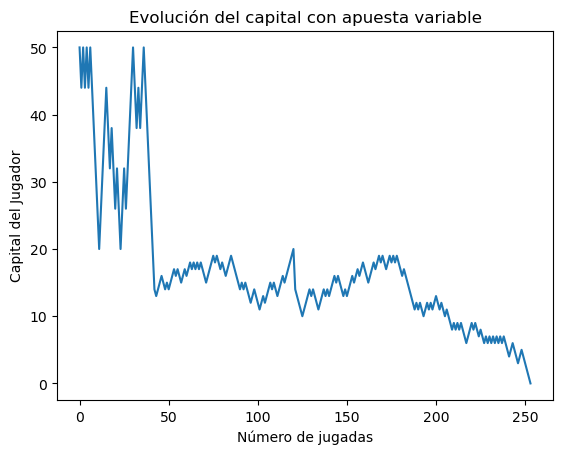

La probabilidad de ruina del jugador con apuesta variable es 0.533


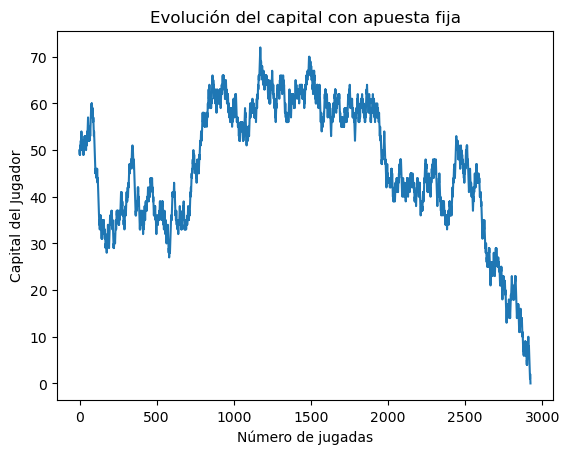

La probabilidad de ruina del jugador con apuesta fija es 0.512


In [7]:
# Parámetros de la simulación
size = 1000   # Número de simulaciones a realizar
M = 50        # Capital inicial del jugador
N = 100       # Capital objetivo del jugador
pa = 0.5      # Probabilidad de ganar en cada jugada

# Verificamos que el capital inicial sea menor que el objetivo
if M >= N:
    print("El capital inicial del jugador debe ser menor que la cantidad total en juego.")
else:
    # Realiza la simulación con apuesta variable
    probabilidad_ruina_variable = simulruina_variable(M, N, pa, size)
    print(f'La probabilidad de ruina del jugador con apuesta variable es {probabilidad_ruina_variable}')
    
    # Realiza la simulación con apuesta fija
    probabilidad_ruina_fija = simulruina_fija(M, N, pa, size)
    print(f'La probabilidad de ruina del jugador con apuesta fija es {probabilidad_ruina_fija}')


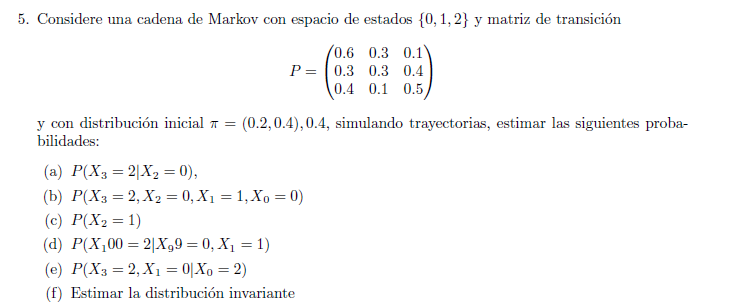

1. **Función `rmarkovchain`**:
   - Esta función simula una cadena de Markov utilizando una matriz de transición fija `P` y una distribución de probabilidad inicial `pi`.
   - **Parámetros**:
     - `pi`: distribución inicial que define las probabilidades de inicio en cada estado.
     - `pasos`: cantidad de pasos o transiciones a simular en la cadena.
   - **Simulación**:
     - Se elige un estado inicial en función de `pi`.
     - Para cada paso, el siguiente estado se determina de acuerdo con la probabilidad de transición en la matriz `P`, que define cómo un estado se mueve a otro.
     - La secuencia de estados a lo largo de los pasos se almacena y devuelve.

2. **Visualización de la Cadena de Markov**:
   - Se simula una trayectoria de 20 pasos usando una distribución inicial `[0.2, 0.4, 0.4]`.
   - Un gráfico de escalón (`plt.step`) muestra la secuencia de estados alcanzados en cada paso, ayudando a visualizar cómo la cadena evoluciona en el tiempo.
   - El gráfico incluye etiquetas en los ejes, un título, y una cuadrícula para facilitar la interpretación.


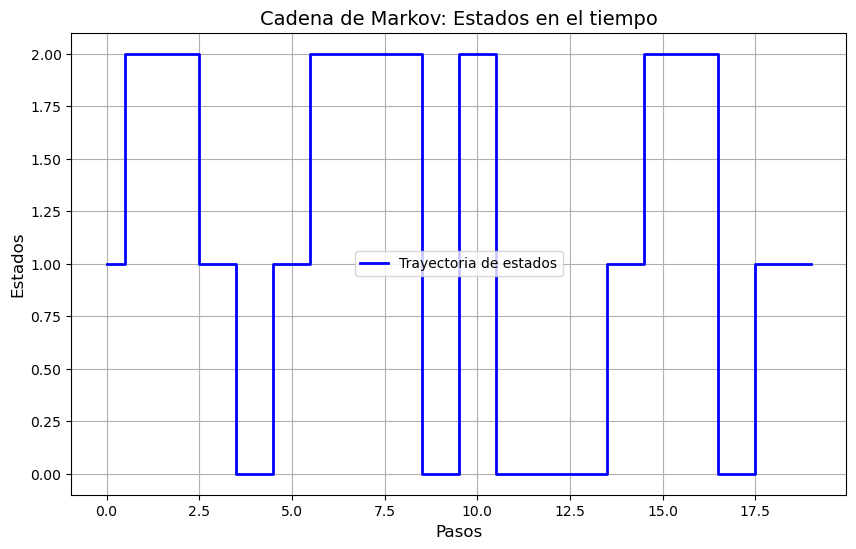

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def rmarkovchain(pi, pasos):  
    """
    Simula una cadena de Markov con una distribución inicial dada y una matriz de transición fija.

    Parameters:
    pi (list): Distribución inicial de probabilidad para cada estado.
    pasos (int): Número de pasos a simular en la cadena de Markov.

    Returns:
    numpy.ndarray: Secuencia de estados simulados a lo largo de los pasos.
    """
    # Matriz de transición que define las probabilidades de cambio entre estados
    P = np.array([
        [0.6, 0.3, 0.1],  # Probabilidades de transición desde el estado 0
        [0.3, 0.3, 0.4],  # Probabilidades de transición desde el estado 1
        [0.4, 0.1, 0.5]   # Probabilidades de transición desde el estado 2
    ])
    
    states = [0, 1, 2]  # Lista de posibles estados en la cadena
    # Selecciona el estado inicial basado en la distribución inicial `pi`
    x = [np.random.choice(states, p=pi, size=1)[0]]
    
    # Simula la cadena de Markov por el número de pasos especificado
    for i in range(pasos - 1):
        estado_actual = x[-1]  # Obtiene el estado actual
        # Selecciona el siguiente estado basado en la fila correspondiente de la matriz P
        next_estado = np.random.choice(states, p=P[estado_actual])
        x.append(next_estado)  # Agrega el estado siguiente a la secuencia

    return np.array(x)  # Devuelve la secuencia de estados como un array

# Simular una trayectoria de la cadena de Markov
D = rmarkovchain([0.2, 0.4, 0.4], 20)

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Genera un gráfico de escalón que muestra los estados en cada paso
plt.step(range(len(D)), D, where='mid', color='blue', lw=2, label='Trayectoria de estados')

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Pasos', fontsize=12)
plt.ylabel('Estados', fontsize=12)
plt.title('Cadena de Markov: Estados en el tiempo', fontsize=14)

# Agrega cuadrícula y leyenda
plt.grid(True)
plt.legend()
plt.show()



In [9]:
import numpy as np
import matplotlib.pyplot as plt

def rmarkovchain(pi, pasos):  
    """
    Simula una cadena de Markov a partir de una distribución inicial y una matriz de transición.

    Parameters:
    pi (list): Distribución de probabilidad inicial para los estados.
    pasos (int): Número de pasos a simular en la cadena de Markov.

    Returns:
    numpy.ndarray: Array con la secuencia de estados simulados en la cadena de Markov.
    """
    # Matriz de transición que define las probabilidades de transición entre estados
    P = np.array([
        [0.6, 0.3, 0.1],  # Probabilidades de transición desde el estado 0
        [0.3, 0.3, 0.4],  # Probabilidades de transición desde el estado 1
        [0.4, 0.1, 0.5]   # Probabilidades de transición desde el estado 2
    ])
    
    states = [0, 1, 2]  # Lista de posibles estados en la cadena de Markov
    # Selecciona el estado inicial basado en la distribución inicial `pi`
    x = [np.random.choice(states, p=pi, size=1)[0]]
    
    # Itera para simular la secuencia de la cadena de Markov
    for i in range(pasos - 1):
        estado_actual = x[-1]  # Obtiene el estado actual
        # Selecciona el siguiente estado basado en la matriz de transición `P`
        next_estado = np.random.choice(states, p=P[estado_actual])
        x.append(next_estado)  # Agrega el nuevo estado a la secuencia

    return np.array(x)  # Devuelve la secuencia de estados como un array




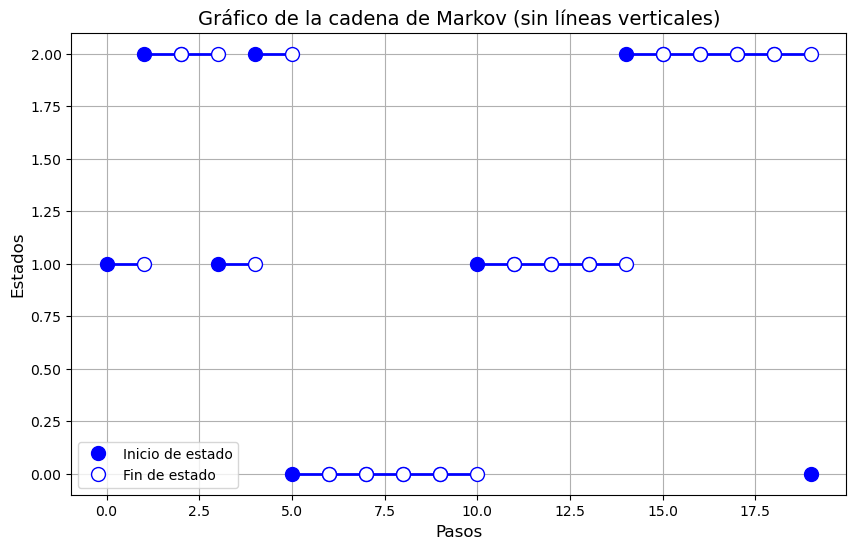

In [10]:
# Simular una trayectoria de la cadena de Markov
D = rmarkovchain([0.2, 0.4, 0.4], 20)

# Configurar la figura para la visualización
plt.figure(figsize=(10, 6))

# Dibujar líneas horizontales para los estados sin mostrar líneas verticales
for i in range(len(D) - 1):
    plt.hlines(D[i], i, i + 1, color='blue', lw=2)  # Líneas horizontales que representan el estado en cada paso

# Agregar puntos de inicio y fin de estado
plt.plot(range(len(D)), D, 'bo', markersize=10, label='Inicio de estado')  # Puntos rellenos al inicio de cada paso
plt.plot(range(1, len(D)), D[:-1], 'bo', mfc='white', markersize=10, label='Fin de estado')  # Puntos vacíos al final de cada paso

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Pasos', fontsize=12)
plt.ylabel('Estados', fontsize=12)
plt.title('Gráfico de la cadena de Markov (sin líneas verticales)', fontsize=14)

# Mejorar la cuadrícula y añadir la leyenda
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.show()


In [27]:
# Simulaciones
num_simulaciones = 1000
pasos = 120

# Contadores
ea = 0
eb = 0
ec = 0
ed = 0
ee = 0
total_ea = 0
total_ed = 0
total_ee = 0

# Realiza la simulación para cada uno de los casos
for i in range(num_simulaciones):
    D = rmarkovchain([0.2, 0.4, 0.4], pasos)
    
    # (a) P(X_3 = 2 | X_2 = 0): Probabilidad condicional
    if D[2] == 0:  # Si el estado en el paso 2 es 0
        total_ea += 1  # Cuenta los casos en que X_2 = 0
        if D[3] == 2:  # Verifica si X_3 es 2 en estos casos
            ea += 1
    
    # (b) P(X_3 = 2, X_2 = 0, X_1 = 1, X_0 = 0): Probabilidad conjunta
    if D[0] == 0 and D[1] == 1 and D[2] == 0 and D[3] == 2:
        eb += 1

    # (c) P(X_2 = 1): Probabilidad de que el estado en el paso 2 sea 1
    if D[2] == 1:
        ec += 1

    # (d) P(X_100 = 2 | X_99 = 0, X_1 = 1): Probabilidad condicional
    if D[99] == 0 and D[1] == 1:  # Condición: X_99 = 0 y X_1 = 1
        total_ed += 1
        if D[100] == 2:  # Verifica si X_100 es 2 en estos casos
            ed += 1

    # (e) P(X_3 = 2, X_1 = 0 | X_0 = 2): Probabilidad condicional
    if D[0] == 2:  # Condición: X_0 = 2
        total_ee += 1
        if D[1] == 0 and D[3] == 2:  # Verifica si X_1 = 0 y X_3 = 2 en estos casos
            ee += 1

# Cálculos de las probabilidades con manejo de divisiones por cero
prob_a = ea / total_ea if total_ea > 0 else 0
prob_b = eb / num_simulaciones
prob_c = ec / num_simulaciones
prob_d = ed / total_ed if total_ed > 0 else 0
prob_e = ee / total_ee if total_ee > 0 else 0

# Imprimir los resultados de cada probabilidad
print(f"(a) P(X_3 = 2 | X_2 = 0) = {prob_a:.4f}")
print(f"(b) P(X_3 = 2, X_2 = 0, X_1 = 1, X_0 = 0) = {prob_b:.4f}")
print(f"(c) P(X_2 = 1) = {prob_c:.4f}")
print(f"(d) P(X_100 = 2 | X_99 = 0, X_1 = 1) = {prob_d:.4f}")
print(f"(e) P(X_3 = 2, X_1 = 0 | X_0 = 2) = {prob_e:.4f}")

# (f) Estimar la distribución invariante
D_finales = [rmarkovchain([0.2, 0.4, 0.4], pasos)[-1] for i in range(num_simulaciones)]
unique, counts = np.unique(D_finales, return_counts=True)
distribucion_invariante = counts / num_simulaciones
print(f"(f) Distribución invariante estimada: {dict(zip(unique, distribucion_invariante))}")


(a) P(X_3 = 2 | X_2 = 0) = 0.0938
(b) P(X_3 = 2, X_2 = 0, X_1 = 1, X_0 = 0) = 0.0010
(c) P(X_2 = 1) = 0.2330
(d) P(X_100 = 2 | X_99 = 0, X_1 = 1) = 0.1296
(e) P(X_3 = 2, X_1 = 0 | X_0 = 2) = 0.0860
(f) Distribución invariante estimada: {0: 0.449, 1: 0.246, 2: 0.305}


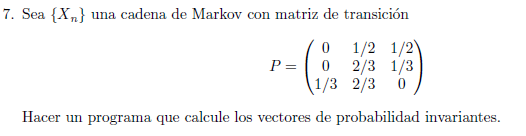

1. **Función `rmarkovchain_simulaciones`**:
   - **Objetivo**: Simular una cadena de Markov a partir de una matriz de transición `P` y una distribución inicial `pi_inicial`.
   - **Proceso**:
     - Comienza en un estado inicial determinado aleatoriamente según `pi_inicial`.
     - Para cada paso, elige el siguiente estado según las probabilidades de la fila correspondiente en `P`.
   - **Salida**: Devuelve la secuencia de estados a lo largo de los pasos simulados.

2. **Estimación del Vector Invariante**:
   - **Simulación a Largo Plazo**:
     - Se simulan `100,000` pasos de la cadena con una distribución inicial uniforme (`[1/3, 1/3, 1/3]`), asegurando suficiente tiempo para aproximarse a una distribución invariante.
   - **Cálculo de Frecuencias Relativas**:
     - Se calcula la frecuencia de cada estado en la secuencia resultante, que proporciona una estimación del vector de probabilidad invariante.
   - **Resultado**: El vector de probabilidad invariante estimado se imprime como un diccionario que mapea cada estado a su frecuencia relativa.


In [12]:
import numpy as np

# Matriz de transición
P = np.array([
    [0, 1/2, 1/2],    # Probabilidades de transición desde el estado 0
    [0, 2/3, 1/3],    # Probabilidades de transición desde el estado 1
    [1/3, 2/3, 0]     # Probabilidades de transición desde el estado 2
])

def rmarkovchain_simulaciones(P, pi_inicial, pasos):  
    """
    Simula una cadena de Markov dada una matriz de transición y una distribución inicial.

    Parameters:
    P (numpy.ndarray): Matriz de transición de la cadena de Markov.
    pi_inicial (list): Distribución de probabilidad inicial para los estados.
    pasos (int): Número de pasos a simular en la cadena.

    Returns:
    numpy.ndarray: Secuencia de estados simulados a lo largo de los pasos.
    """
    states = [0, 1, 2]  # Lista de posibles estados
    x = [np.random.choice(states, p=pi_inicial)]  # Selecciona un estado inicial basado en `pi_inicial`
    
    # Simula la cadena de Markov durante el número de pasos indicado
    for i in range(pasos - 1):
        estado_actual = x[-1]  # Obtiene el estado actual
        # Determina el siguiente estado basado en la fila correspondiente de `P`
        next_estado = np.random.choice(states, p=P[estado_actual])
        x.append(next_estado)  # Añade el siguiente estado a la secuencia

    return np.array(x)  # Devuelve la secuencia de estados como un array

# Parámetros para simulaciones a largo plazo
num_simulaciones = 100000  # Número total de simulaciones
pasos = 100000  # Número de pasos para alcanzar una distribución invariante

# Distribución inicial (se usa una distribución uniforme)
pi_inicial = [1/3, 1/3, 1/3]

# Simular la cadena de Markov
D = rmarkovchain_simulaciones(P, pi_inicial, pasos)

# Calcular las frecuencias relativas de los estados
unique, counts = np.unique(D, return_counts=True)
vector_invariante_simulado = counts / pasos  # Vector de probabilidad invariante estimado

# Imprimir el resultado
print(f"El vector de probabilidad invariante estimado es: {dict(zip(unique, vector_invariante_simulado))}")



El vector de probabilidad invariante estimado es: {0: 0.08707, 1: 0.64961, 2: 0.26332}


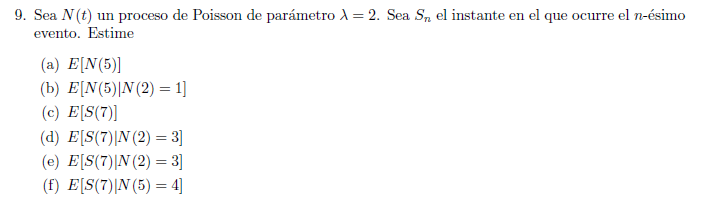

1. **Función `exp`**:
   - **Objetivo**: Generar `n` muestras de una distribución exponencial con parámetro `λ` (lambda).
   - **Proceso**:
     - Genera números aleatorios `u` entre 0 y 1, y los transforma usando la fórmula de la distribución exponencial.
   - **Salida**: Devuelve un array de `n` valores distribuidos exponencialmente.

2. **Función `simular_poisson`**:
   - **Objetivo**: Simular un proceso de Poisson hasta un tiempo máximo `t_max`, generando los tiempos en los que ocurren eventos.
   - **Proceso**:
     - Comienza en un tiempo inicial `t_actual = 0`.
     - Para cada evento, calcula el tiempo entre eventos usando `exp` y actualiza `t_actual` hasta alcanzar `t_max`.
     - Guarda cada tiempo acumulado (momento de ocurrencia de cada evento) en la lista `tiempos`.
   - **Salida**: Devuelve un array con los tiempos de cada evento en el proceso.


In [13]:
import numpy as np
import math

# Función exponencial proporcionada
def exp(n, l):
    """
    Genera una lista de valores distribuidos exponencialmente.

    Parameters:
    n (int): Número de muestras a generar.
    l (float): Parámetro de tasa (lambda) para la distribución exponencial.

    Returns:
    numpy.ndarray: Array de valores generados de una distribución exponencial.
    """
    lista = []
    for a in range(n):
        u = np.random.random()  # Genera un número aleatorio entre 0 y 1
        x = -((1 / l) * np.log(1 - u))  # Transforma `u` para obtener un valor exponencial
        lista.append(x)  # Agrega el valor generado a la lista
    return np.array(lista)

# Simulaciones del proceso de Poisson
def simular_poisson(lam, t_max):
    """
    Simula un proceso de Poisson que representa el tiempo entre eventos sucesivos.

    Parameters:
    lam (float): Parámetro lambda de la distribución de Poisson.
    t_max (float): Tiempo máximo de simulación.

    Returns:
    numpy.ndarray: Array con los tiempos de ocurrencia de cada evento en el proceso de Poisson.
    """
    tiempos = []  # Lista para almacenar los tiempos de cada evento
    t_actual = 0  # Tiempo inicial

    while t_actual < t_max:
        # Generar el tiempo entre eventos usando la función exponencial
        t = exp(1, lam).mean()  # Tiempo entre eventos sucesivos
        t_actual += t  # Actualiza el tiempo actual
        tiempos.append(t_actual)  # Guarda el tiempo acumulado para el evento

    return np.array(tiempos)  # Devuelve el array de tiempos de eventos




In [29]:
# Parámetros de simulación
num_simulaciones = 1000  # Número de simulaciones para calcular la media

# (a) E[N(5)]: Esperanza del número de eventos en el intervalo [0, 5]
N5 = [np.sum(simular_poisson(2, 5) <= 5) for i in range(num_simulaciones)]

# Cálculo de la media de eventos en el tiempo 5
print(f"(a) E[N(5)] = {np.mean(N5):.4f}")




(a) E[N(5)] = 10.0990


In [15]:
# Parámetros de simulación
num_simulaciones = 1000  # Número de simulaciones

# (b) E[N(5) | N(2) = 1]: Esperanza condicional del número de eventos hasta el tiempo 5 dado N(2) = 1
N5_condicional = []
for i in range(num_simulaciones):
    tiempos = simular_poisson(2, 5)  # Simula el proceso de Poisson hasta el tiempo 5
    N2 = np.sum(tiempos <= 2)  # Cuenta el número de eventos hasta el tiempo 2
    
    # Condición: solo considerar simulaciones donde N(2) = 1
    if N2 == 1:
        N5_condicional.append(np.sum(tiempos <= 5))  # Cuenta el número de eventos hasta el tiempo 5

# Cálculo de la esperanza condicional
print(f"(b) E[N(5) | N(2) = 1] = {np.mean(N5_condicional):.4f}")




(b) E[N(5) | N(2) = 1] = 6.5455


In [16]:
# (c) E[S_7]: Esperanza del tiempo de ocurrencia del séptimo evento
S7 = [simular_poisson(2, 100)[6] for i in range(num_simulaciones)]  # 7mo evento en cada simulación

# Cálculo de la media de los tiempos de ocurrencia del séptimo evento
print(f"(c) E[S_7] = {np.mean(S7):.4f}")




(c) E[S_7] = 3.5443


In [17]:
# (d) E[S_7 | N(2) = 3]: Esperanza condicional del tiempo del séptimo evento dado N(2) = 3
S7_condicional = []
for i in range(num_simulaciones):
    tiempos = simular_poisson(2, 7)  # Simula los tiempos de eventos hasta el 7mo evento
    N2 = np.sum(tiempos <= 2)  # Cuenta el número de eventos hasta el tiempo 2
    
    # Condición: Solo considerar simulaciones donde N(2) = 3
    if N2 == 3:
        S7_condicional.append(tiempos[6])  # Agrega el tiempo del 7mo evento

# Cálculo de la esperanza condicional
print(f"(d) E[S_7 | N(2) = 3] = {np.mean(S7_condicional):.4f}")




(d) E[S_7 | N(2) = 3] = 4.0944


In [19]:
# (e) E[S_7 | N(2) = 3]: Esperanza condicional del tiempo del séptimo evento dado N(2) = 3
S7_condicional_2 = []
for i in range(num_simulaciones):
    tiempos = simular_poisson(2, 7)  # Simula los tiempos de eventos hasta el 7mo evento
    N2 = np.sum(tiempos <= 2)  # Cuenta el número de eventos hasta el tiempo 2
    
    # Condición: Solo considerar simulaciones donde N(2) = 3
    if N2 == 3:
        S7_condicional_2.append(tiempos[6])  # Agrega el tiempo del 7mo evento

# Cálculo de la esperanza condicional
print(f"(e) E[S_7 | N(2) = 3] = {np.mean(S7_condicional_2):.4f}")


(e) E[S_7 | N(2) = 3] = 3.8731


In [25]:
# (f) E[S_7 | N(5) = 4]: Esperanza condicional del tiempo del séptimo evento dado N(5) = 4
S7_condicional_3 = []
for i in range(num_simulaciones):
    tiempos = simular_poisson(2, 10)  # Aumenta t_max a 10 para asegurar el 7mo evento
    N5 = np.sum(tiempos <= 5)  # Cuenta el número de eventos hasta el tiempo 5
    
    # Condición: Solo considerar simulaciones donde N(5) = 4 y el 7mo evento existe
    if N5 == 4 and len(tiempos) > 6:
        S7_condicional_3.append(tiempos[6])  # Agrega el tiempo del 7mo evento

# Cálculo de la esperanza condicional con verificación de contenido en S7_condicional_3
if S7_condicional_3:
    print(f"(f) E[S_7 | N(5) = 4] = {np.mean(S7_condicional_3):.4f}")
else:
    print("(f) No se encontraron suficientes simulaciones con N(5) = 4 para estimar E[S_7 | N(5) = 4].")



(f) E[S_7 | N(5) = 4] = 6.4401
